# Manual do código

***Por: Gustavo Henrique Siviero Soares***

Como complemento ao trabalho de conclusão de curso. Monografia apresentada ao Instituto de Física de São Carlos, curso de bacharelado em física computacional.

Projeto orientado pelos professores ***Gonzalo Travieso*** e ***Luciano da Fontoura Costa***

São Carlos. Dezembro de 2020.


    Este código tem a intenção de fornecer um arcabouço de métodos para o estudo de sinais sonoros, especialmente visando criar experimentos de sintese sonora através de envelopes e espectros de som. Para auxilio nos experimentos há a disponibilidade de uma base de dados com sinais gravados de diversos intrumento musicais. Com os métodos apresentados podemos carregar um arquivo de som, analisar seu espectro de frequências, criar sinais adicionando frequências em proporções desejadas, identificar as frequências que compõem um sinal, extrair o envelope de um sinal, criar envelopes e adicioná-los à um sinal... Suas funções e maneiras de uso serão tratadas ao londo deste desenvolvimento.  

## Bibliotecas baseadas e Versões



O código utiliza as seguintes bibliotecas

    numpy
    scipy
    playsound
    matplotlib
    os
    librosa
    numba
    
Se for necessário, estabelecer as versões corretas das bibliotecas para vizualização correta do sinal. Podemos fazer isso através do pip do python rodando as linhas do seguinte código:

In [18]:
"""
!pip3 install numpy==1.20.0
!pip3 install scipy==1.6.0
!pip3 install playsound==1.2.2
!pip3 install matplotlib==3.3.4
!pip3 install librosa==0.4.2
!pip3 install numba==0.45
"""

'\n!pip3 install numpy==1.20.0\n!pip3 install scipy==1.6.0\n!pip3 install playsound==1.2.2\n!pip3 install matplotlib==3.3.4\n!pip3 install librosa==0.4.2\n!pip3 install numba==0.45\n'

***Sobre a impressão do sinal***

O método de vizualização do sinal utiliza da biblioteca librosa, que por sua vez está baseada na numba.
Este método é capaz de imprimir o sinal usando uma representação adequada, imprimir diretamente usando o pyplot, por exemplo, cria uma representação distorcida (pode haver assimetria e distorção do envelope) e pode atrapalhar a análise.

O método utilizado encontra-se em uma versão da biblioteca librosa que não é a corrente, então provavelmente será preciso definir as versões de librosa e numba (duas ultimas linhas do código acima), para ter o funcionamento correto.

É possivel também vizualizar o sinal, porém de maneira distorcida, substituindo as funções que utilizam da biblioteca librosa pela seguinte função, que utiliza diretamente o pyplot da matplotlib.

In [19]:
"""
    def plot(self, size=(20,6), title=None, xzoom=None, yzoom=None):
        import matplotlib.pyplot as plt
        plt.figure(figsize=size)
        if title != None:
            plt.title(title)
        plt.xlabel('Tempo')
        plt.ylabel('Amplitude')
        if xzoom != None:
            plt.xlim(0, xzoom)
        if yzoom != None:
            plt.xlim(0, yzoom)
        plt.plot(self.samples, self.time, color="orange")
        plt.show()
        return
"""

'\n    def plot(self, size=(20,6), title=None, xzoom=None, yzoom=None):\n        import matplotlib.pyplot as plt\n        plt.figure(figsize=size)\n        if title != None:\n            plt.title(title)\n        plt.xlabel(\'Tempo\')\n        plt.ylabel(\'Amplitude\')\n        if xzoom != None:\n            plt.xlim(0, xzoom)\n        if yzoom != None:\n            plt.xlim(0, yzoom)\n        plt.plot(self.samples, self.time, color="orange")\n        plt.show()\n        return\n'

## Descompactar a base de dados e definir o caminho

A base de dados encontra-se em ***pulse.zip***, basta descompactar os arquivos em um diretório de sua preferência e depois substituir o caminho do diretório na classe ***pulse_database***. Então a base de dados já estará pronta para usar.



## O código:

    Aqui está apresentada a implementação do código e comentários de documentação.

In [20]:

#SOUND
#Classe para carregamento de arquivos de som do tipo WAV.
#Objeto iniciado com o caminho de um arquivo WAV que se deseja carregar.
#.....
#Parâmetros
#sound.arquive : Caminho do arquivo
#sound.name : Nome do arquivo
#sound.sprate : Taxa de amostragem
#sound.samples : Vetor de amostras
#sound.length : Tempo de duração
#sound.time : vetor de evolução de tempo
#sound.signal : Vetor de tuplas com amostra e tempo
#sound.fft : Transformada de Fourier do sinal
#sound.fftfreq : vetor eixo das frequências da trasnformada de Fourier
#.....
#Métodos
#sound.play() : Tocar o som
#sound.plot() : Imprime um gráfico do sinal
#sound.plotfft() : Imprime uma visualização do espectro de frequências
#sound.plotfft_pure() : Imprime uma vizualização da transformada de Fourier (Sem módulo)
class sound:
    
    def __init__(self, arquive):
        self.arquive = arquive
        self.name = arquive[arquive.rfind('/')+1:].replace('.wav', '')
        from scipy.io import wavfile
        import numpy as np
        sprate, samples = wavfile.read(arquive)
        self.sprate = sprate
        self.samples = samples
        self.length = len(samples)/sprate
        self.time = np.linspace(0., self.length, len(samples))
        self.signal = list(zip(self.time, samples))
        self.fft = np.fft.fft(samples)
        self.fftfreq = np.fft.fftfreq(len(samples), d=1/sprate)
        return
        
    def play(self):
        from playsound import playsound
        playsound(self.arquive)
        return
        
    def plot(self, size=(20,6), title=None, xzoom=None, yzoom=None):
        import librosa
        import matplotlib.pyplot as plt
        import librosa.display
        import numpy as np 
        plt.figure(figsize=size)
        if title != None:
            plt.title(title)
        plt.xlabel('Tempo')
        plt.ylabel('Amplitude')
        if xzoom != None:
            plt.xlim(0, xzoom)
        if yzoom != None:
            plt.xlim(0, yzoom)
        x = np.array(self.samples)
        #librosa.display.waveshow(x, sr=44100, alpha=0.8)
        librosa.display.waveplot(x, sr=self.sprate, color='orange', alpha=0.8)
        plt.show()
        return 

    def plotfft_pure(self, size=(20,6)):
        import matplotlib.pyplot as plt
        import numpy as np
        plt.figure(1,figsize=size)
        plt.title("FFT")
        plt.xlabel("Frequency(Hz)")
        plt.ylabel("Real")
        plt.plot(self.fftfreq, np.array(self.fft).real, color='darkcyan')
        plt.show()
        return 
    
    def plotfft(self, size=(20,6), xzoom=3000, yzoom=None, lw=1.8):
        import matplotlib.pyplot as plt
        msp = []
        for i in self.fft:
            msp.append(abs(i))
        mfreq = [] 
        for i in self.fftfreq:
            mfreq.append(abs(i))
        plt.figure(1,figsize=size)
        plt.xlabel("Frequência (Hz)")
        plt.xlim(0, xzoom)
        if yzoom != None:
            plt.ylim(0, yzoom)
        plt.ylabel("Módulo")
        plt.plot(mfreq, msp, color='darkcyan', lw=lw)
        plt.show()
        return 

    
    
    
    
#SIGNAL
#Classe para criação de um sinal sonoro.
#Objeto iniciado sem parâmetros.
#.....
#Parâmetros
#signal.sprate : Taxa de amostragem
#signal.samples : Vetor de amostras do sinal criado
#signal.length : Tempo de duração
#signal.time : vetor de evolução de tempo
#signal.fundamental : Valor da frequência fundamental
#.....
#Métodos
#signal.oscilation() : Cria o sinal com a frequência principal pretendida e define o tempo de duração
#signal.add() : Adiciona uma nova frequência ao sinal.
#signal.exp_decay() : Adiciona um decaimento exponencial ao sinal.
#signal.envelopment() : Adiciona um envelope. Requer um objeto da classe envelope
#signal.create() : Cria um arquivo de som WAV com o sinal criado.
#signal.play() : Tocar o som
#signal.plot() : Imprime um gráfico do sinal
#signal.plotfft() : Imprime uma visualização do espectro de frequências  
class signal:
    
    def __init__(self):
        self.samples = None
        self.time = None
        self.length = None
        self.sprate = 44100
        self.fundamental = None
        
    def oscilation(self, f, T):
        import numpy as np
        t = np.linspace(0, T, int(T*self.sprate), endpoint=False)
        x = np.sin(2*np.pi*f*t)
        self.fundamental = f
        self.samples = x
        self.time = t
        self.length = T
        return self
    
    def add(self, f, P):
        import numpy as np
        x = np.sin(2*np.pi*f*self.time)*P
        self.fundamental = f
        self.samples = self.samples + x
        return self
    
    def play(self):
        import numpy as np
        from scipy.io import wavfile
        from playsound import playsound
        X = self.samples*(1/max(self.samples)) #normalização
        wavfile.write('playing.wav', self.sprate, np.float32(X))
        playsound('playing.wav')
        return
    
    def plot(self, size=(20,6), title=None, xzoom=None, yzoom=None):
        import librosa
        import matplotlib.pyplot as plt
        import librosa.display
        import numpy as np 
        plt.figure(figsize=size)
        if title != None:
            plt.title(title)
        plt.xlabel('Tempo')
        plt.ylabel('Amplitude')
        if xzoom != None:
            plt.xlim(0, xzoom)
        if yzoom != None:
            plt.xlim(0, yzoom)
        x = np.array(self.samples)
        #librosa.display.waveshow(x, sr=self.sprate, alpha=0.8)
        librosa.display.waveplot(x, sr=self.sprate, color='orange', alpha=0.8)
        plt.show()
        return
    
    def plotfft(self, size=(20,6), xzoom=3000, yzoom=None, lw=1.8):
        import matplotlib.pyplot as plt
        import numpy as np
        self.fft = np.fft.fft(self.samples)
        self.fftfreq = np.fft.fftfreq(len(self.samples), d=1/self.sprate)
        msp = []
        for i in self.fft:
            msp.append(abs(i))
        mfreq = [] 
        for i in self.fftfreq:
            mfreq.append(abs(i))
        plt.figure(1,figsize=size)
        #plt.title("Espectro")
        plt.xlabel("Frequência (Hz)")
        plt.xlim(0, xzoom)
        if yzoom != None:
            plt.ylim(-(yzoom/50), yzoom)
        plt.ylabel("Módulo")
        plt.plot(mfreq, msp, color='darkcyan', lw=lw)
        plt.show()
        return 
        
    def exp_decay(self, alpha):
        import numpy as np
        dt = 1/self.sprate
        t = np.arange(0, self.length, dt)
        self.samples = self.samples*np.exp(alpha*(self.length - t))*120
        return self
    
    def envelopment(self, env):
        import numpy as np
        L = min([len(self.samples), len(env.samples)])
        t=self.time[:L] ; sp=self.samples[:L] ; env=env.samples[:L]
        newsp = np.array(sp)*np.array(env)
        self.samples = newsp
        return self
    
    def create(self, nome):
        import numpy as np
        from scipy.io import wavfile
        #Normalizar antes de criar o arquivo
        X = self.samples*(1/max(self.samples))
        wavfile.write(nome+'.wav', self.sprate, np.float32(X))
        return nome+'.wav'
    
    
    
    
    
    
#ENVELOPE
#Classe para criação, coleta e tratamento de envelope
#Objeto iniciado sem parâmetros
#.....
#Parâmetros
#envelope.samples : Vetor de amostras do envelope
#envelope.lenght : Comprimento do envelope
#envelope.sprate : Taxa de amostragem
#.....
#Métodos
#envelope.get_hilbert() : Obtém o envelope de um som através do método de Hilbert
#envelope.lowpass() : Filtro passa baixa para o envelope
#envelope.geometric() : Cria um envelope geométrico
class envelope:

    def __init__(self):
        self.samples = None
        self.length = None
        self.sprate = 44100
        return
        
    def get_hilbert(self, sig):
        from scipy.signal import hilbert
        import numpy as np
        
        s = hilbert(sig.samples)
        self.samples = np.abs(s)
        self.lenght = len(s)
        return self
    
    def plot(self, size=(26,6), color="brown", lw=1):
        import matplotlib.pyplot as plt
        if type(self.samples) == type(None):
            print("Empty envelope!")
        else:
            plt.figure(figsize=size)
            plt.plot(self.samples, color=color, lw=lw)
            plt.xticks([])  
            plt.yticks([])
            plt.show()
        return
    
    def exp_decay(self, alpha, length):
        import numpy as np
        dt = 1/self.sprate
        t = np.arange(0, length, dt)
        if self.samples == None:
            self.samples = np.exp(alpha*(length - t))*120
        else:
            self.samples = self.samples*np.exp(alpha*(self.length - t))*120
        return self
    
    def geometric(self, lar, length):
        import numpy as np
        dt = 1/self.sprate
        intv = []
        coefs = []
        for i in range(1,len(lar)):
            intv.append((lar[i-1][0],lar[i][0]))
            if (lar[i][0] - lar[i-1][0]) == 0:
                coefs.append(1)
            else:
                coefs.append((lar[i][1] - lar[i-1][1])/(lar[i][0] - lar[i-1][0]))
        intv.append((lar[i][0],length))
        if (length - lar[i][0]) == 0:
            coefs.append(1)
        else:
            coefs.append((1 - lar[i-1][1])/(length - lar[i][0]))
        env = []
        for i, c, l in zip(intv, coefs, lar):
            env = env + list(l[1] + c*np.arange(0, i[1]-i[0],dt))
        self.samples = env[:int(self.sprate*length)]
        self.length = length
        return self
    
    def lowpass(self, wd, N=2):
        from scipy import signal
        b, a = signal.butter(N, wd, btype='lowpass')
        self.samples = signal.filtfilt(b, a, self.samples)
        return self
    
    def highpass(self, wd, N=2):
        from scipy import signal
        b, a = signal.butter(N, wd, btype='highpass')
        self.samples = signal.filtfilt(b, a, self.samples)
        return self
    
    
    
    
    
#SPECTRUM
#Classe para criação, coleta e tratamento de espectros de som
#Objeto iniciado sem parâmetros
#.....
#Parâmetros
#spectrum.samples : Vetor de amostras do espectro
#spectrum.freqs : Lista de frequências que compõem o espectro
#spectrum.sprate : Taxa de amostragem
#spectrum.fundamental : Valor da frequência fundamental do espectro
#spectrum.compare : parametro de comparação
#spectrum.principls : Vetor de frequencias principais ordenadas e suas proporções
#.....
#Métodos
#spectrum.get() : obtém o espectro de um som passado e porcentagem de consideração de frequencias
#spectrum.plot() : Mostra o espectro e o limite de consideração de frequencias
class spectrum:
    
    def __init__(self):
        self.samples = None
        self.freqs = None
        self.sprate = None
        self.fundamental = None
        self.compare = None
        self.principals = None
        return
        
    def get(self, sound, accuracy):
        import numpy as np
        self.samples = np.fft.fft(sound.samples)
        self.freqs = np.fft.fftfreq(len(sound.samples), d=1/sound.sprate)
        self.sprate = sound.sprate
        sig = []
        for i in range(len(self.freqs)):
            sig.append((abs(self.samples[i]), abs(self.freqs[i])))  
        topos = []
        self.fundamental = max(sig)[1]
        self.compare = (accuracy/100)*max(sig)[0]
        for i in range(len(sig)):
            if i < len(sig) - 2:
                if sig[i][0] > sig[i-1][0] and sig[i][0] > sig[i+1][0] and sig[i][0] > self.compare:
                    topos.append(sig[i])
        topos = topos[:int(len(topos)/2)]
        topos.sort(reverse = True)
        self.principals = topos
        return self
    
    def plot_pure(self, size=(20,6)):
        import matplotlib.pyplot as plt
        import numpy as np
        plt.figure(1,figsize=size)
        plt.title("FFT")
        plt.xlabel("Frequency(Hz)")
        plt.ylabel("Real")
        plt.plot(self.freqs, np.array(self.samples).real, color='darkcyan')
        plt.show()
        return 
    
    def plot(self, size=(20,6), xzoom=3000, yzoom=None, lw=1.8):
        import matplotlib.pyplot as plt
        msp = []
        for i in self.samples:
            msp.append(abs(i))
        mfreq = [] 
        for i in self.freqs:
            mfreq.append(abs(i))
        plt.figure(1,figsize=size)
        #plt.title("Espectro")
        plt.xlabel("Frequência (Hz)")
        plt.xlim(0, xzoom)
        if yzoom != None:
            plt.ylim(0, yzoom)
        plt.ylabel("Módulo")
        plt.plot(mfreq, msp, color='darkcyan', lw=lw)
        if self.compare != None and self.principals != None:
            plt.axhline(y=self.compare, color='red')
            for i in self.principals:
                plt.scatter(i[1], i[0], color='red')
        plt.show()
        return
        
        
        
        
#PULSES_DATABASE
#Classe da base de dados
class pulses_database:
    
    def __init__(self, path = '/home/dakkar/Graduação Fisica Computacional USP/TCC/pulse.data'):
        
        from os import listdir
        from os.path import isfile, isdir, join
        
        subpaths = [f for f in listdir(path) if isdir(join(path, f))]
        self.instruments = [f.replace('.data', '') for f in subpaths]
        self.objects = dict()
        for i in self.instruments:
            self.objects[i] = path+'/'+i+'.data'
        return
    
    def dataset(self, inst):
        from os import listdir
        from os.path import isfile, isdir, join
        path = self.objects[inst]
        files = [path+'/'+f for f in listdir(path) if isfile(join(path, f))]
        dataset = dict()
        for i in files:
            key = i.replace(path+'/','').replace(inst+'_','').replace('.wav','')
            dataset[key] = i
        return dataset
    
    def show(self):
        print('Database Available Instruments and Their Respective Keys \n')
        for i in self.instruments:
            print('\t'+i, end=': ')
            print([i for i in self.dataset(i).keys()], end='\n\n')

            
            
            
#Outros métodos

def sintet(som, percent=1.0):
    spec = spectrum()
    spec.get(som, percent)
    sig = signal()
    sig.oscilation(spec.principals[0][1], 4)
    for i in spec.principals[:nh]:
        proportion = i[0]/spec.principals[0][0]
        sig.add(i[1], proportion)
    return sig

def invert(a, b, nh=50, filtparam=0.002):
    spec = spectrum()
    spec.get(a, 1)
    env = envelope()
    env.get_hilbert(b).lowpass(filtparam)
    env.plot()
    sig = signal()
    sig.oscilation(spec.principals[0][1], 4)
    for i in spec.principals[:nh]:
        proportion = i[0]/spec.principals[0][0]
        sig.add(i[1], proportion)
    sig.envelopment(env)
    return sig

## Classe da Base de Dados (pulses_database)

In [21]:
database = pulses_database() 
database.show()

Database Available Instruments and Their Respective Keys 

	violin_pulse: ['G3', 'D4', 'E5', 'A4']

	drums: ['snare', 'ground', 'crash16', 'open_hithat', 'crash_bulbe', 'closed_hithat', 'tom']

	steel_guitar: ['B3', 'D3', 'E4', 'A2', 'G3', 'E2']

	eletric_guitar: ['D3', 'B3', 'E2', 'A2', 'E4', 'G3']

	nylon_guitar: ['D3', 'A2', 'E4', 'E2', 'G3', 'B3']

	distortion_guitar: ['G3', 'E2', 'D3', 'B3', 'E4', 'A2']

	harmonica: ['C6', 'E5', 'E4', 'C5', 'C4', 'Cmajor', 'G4']

	viola_caipira: ['A4', 'F#3', 'A2', 'D4', 'D3']

	bass: ['E1', 'G2', 'D2', 'A1']

	violin_pick: ['A4', 'D4', 'G3', 'E5']



Para criar um objeto da classe sound com a base de dados utilizamos a seguinte sintaxe:

In [22]:
database.dataset('viola_caipira')['F#3']

'/home/dakkar/Graduação Fisica Computacional USP/TCC/pulse.data/viola_caipira.data/viola_caipira_F#3.wav'

## Classe de Som (sound)



In [23]:
sd = sound(database.dataset('viola_caipira')['F#3'])
sd.play()

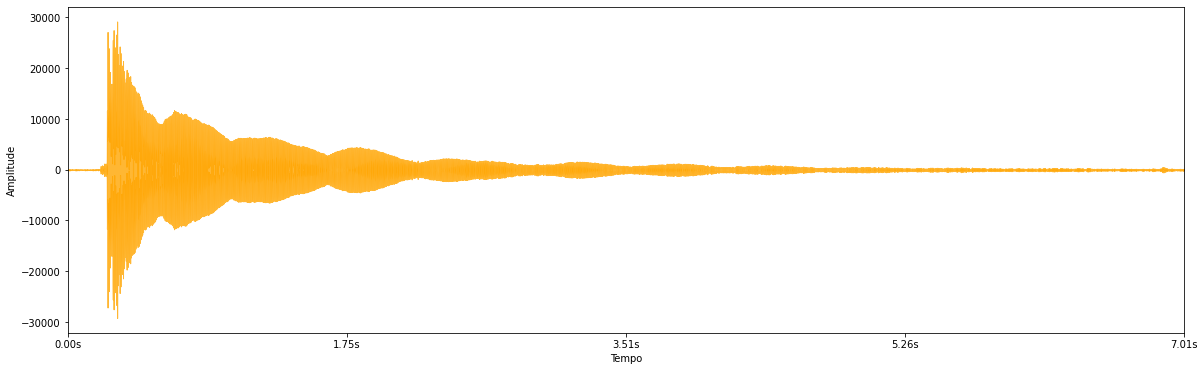

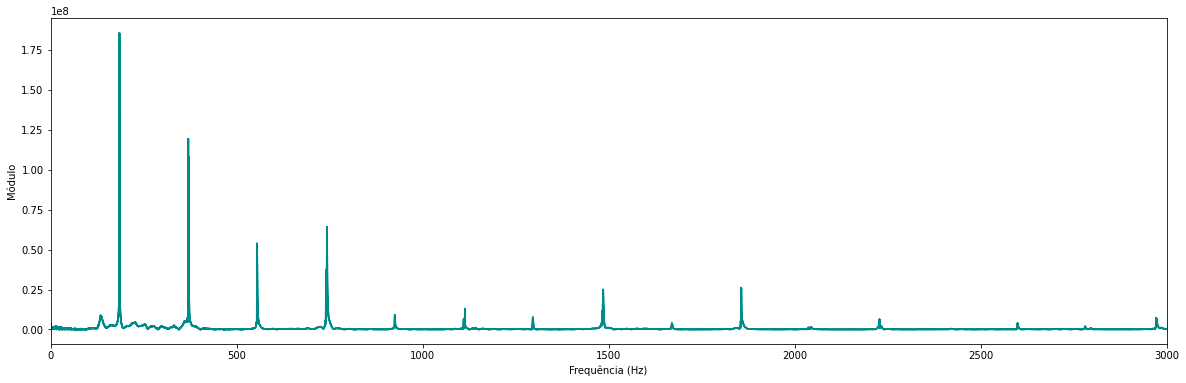

In [24]:
sd.plot()
sd.plotfft()

## Classe de Sinal (signal)

In [25]:
sig = signal()
sig.oscilation(220, 4).add(440, 0.5).add(880, 0.2)
sig.play()

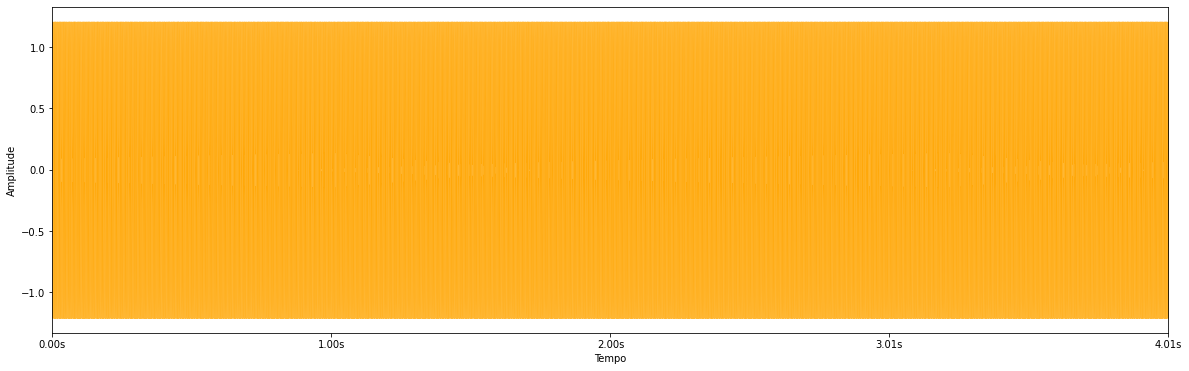

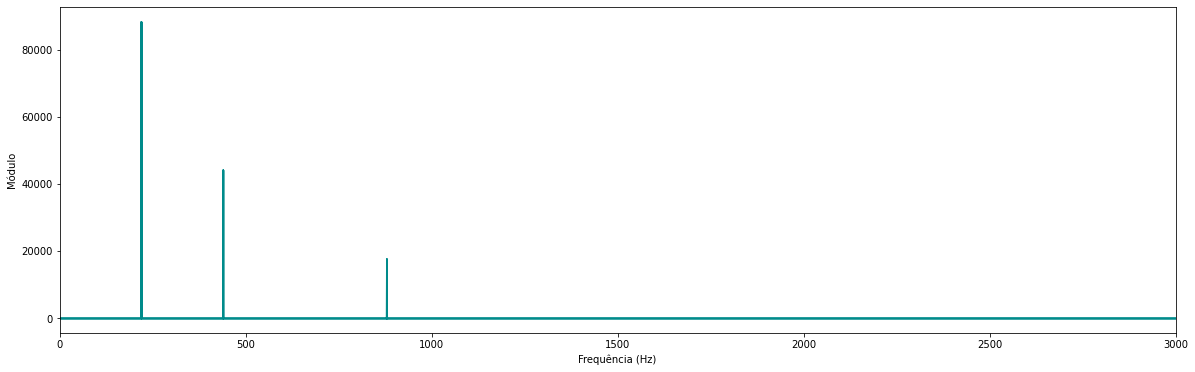

In [26]:
sig.plot()
sig.plotfft()

In [27]:
sig.create("exemplo")

'exemplo.wav'

## Classe de Envelope (envelope)

#### Criando um envelope geométrico

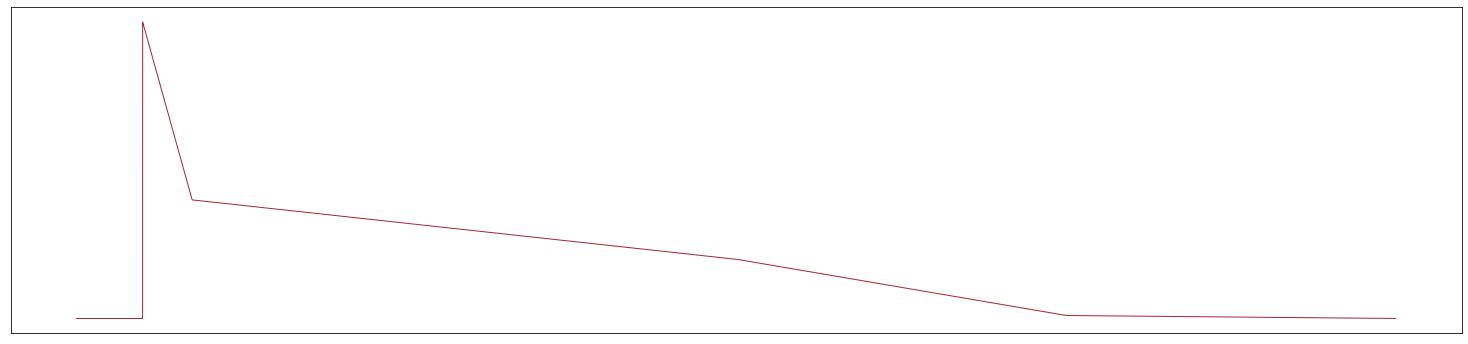

In [28]:
env = envelope().geometric([(0,0),(0.2,0),(0.2001, 1),(0.35,0.4),(2,0.2),(3,0.01),(4,0)], 4)
env.plot()

Adicionar decaimento exponencial

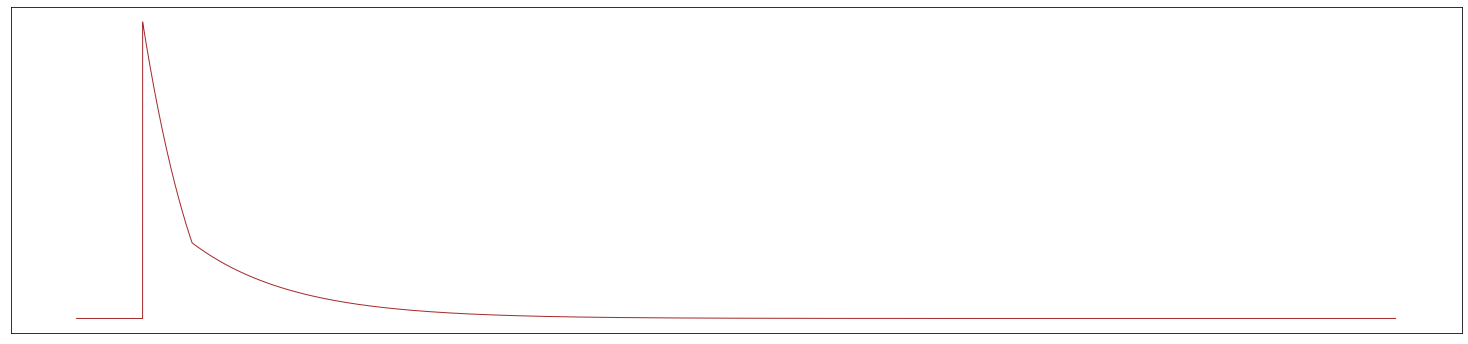

In [29]:
env.exp_decay(3, 4)
env.plot()

#### Envelopando um sinal

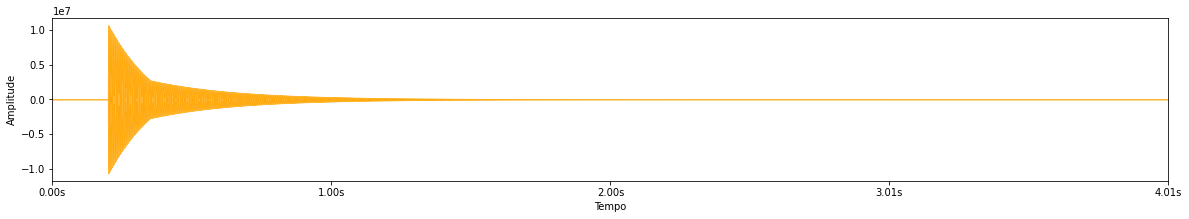

In [30]:
sig = signal().oscilation(440, 4)
sig.envelopment(env)

sig.plot(size=(20,3))
sig.play()

#### Extraindo um envelope

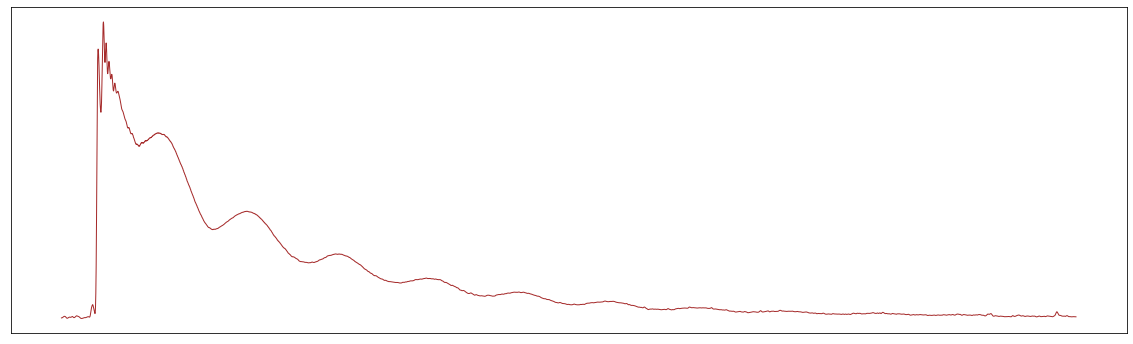

In [31]:
sd = sound(database.dataset('viola_caipira')['F#3'])
env = envelope().get_hilbert(sd).lowpass(0.002)
env.plot(size=(20,6))

## Classe de Espectro (spectrum)

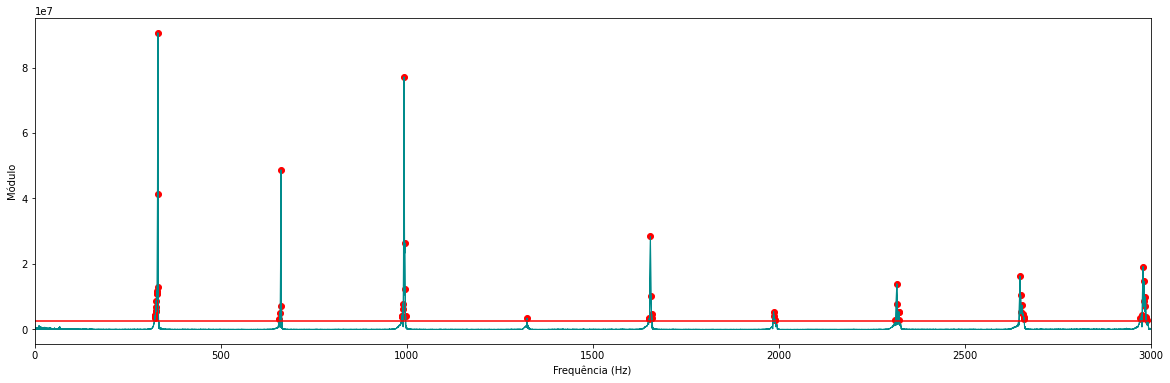

In [32]:
database = pulses_database() 
spec = spectrum().get(sound(database.dataset('harmonica')['E4']), 3)
spec.plot(lw=1)

Lista das frequências

In [33]:
spec.principals[:10]

[(90547693.12894386, 331.42749780531966),
 (77105930.26653162, 993.2824966553395),
 (48705721.67377463, 662.2835688902853),
 (41269974.83051458, 332.28463788585066),
 (29702869.23609524, 3643.845339017366),
 (29058429.556876477, 3640.988205415596),
 (28430663.18405299, 1655.566065545625),
 (27150132.30106443, 3310.846417731073),
 (26472217.366312418, 4634.413558751024),
 (26408283.125268675, 994.9967768164015)]

## Compor Sons

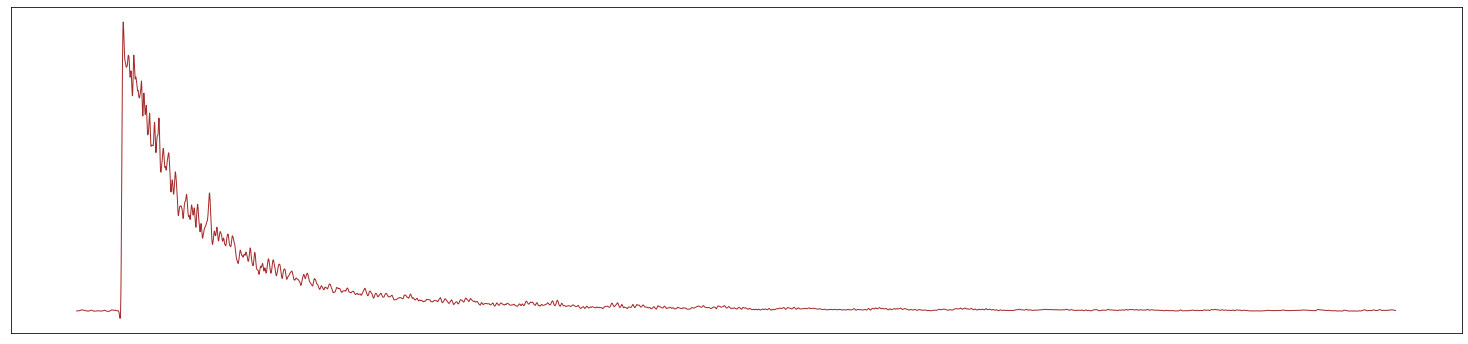

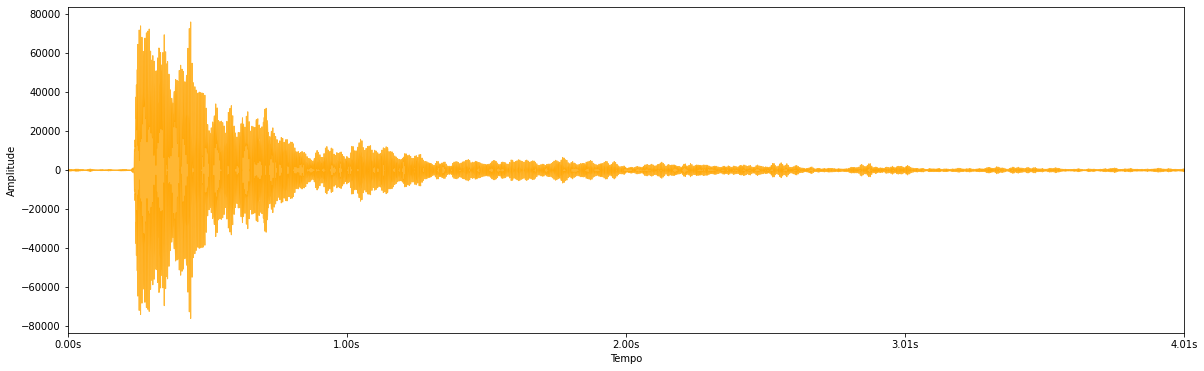

In [34]:
a = sound(database.dataset('violin_pick')['G3']) #espectro
b = sound(database.dataset('drums')['crash16']) #envelope
new = invert(a, b, filtparam=0.003)
new.plot()